In [19]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import datetime

In [20]:
#Load the csv file for green taxis into a pandas dataframe
greenAug = pd.read_csv('Cleaned_Green_Traffic.csv')
df_greenAug = pd.DataFrame(greenAug)

##Load the csv file for traffic traffic into a pandas dataframe
traffic = pd.read_csv('Cleaned_Traffic_Count.csv')
df_traffic = pd.DataFrame(traffic)

#Load the csv file for green taxis into a pandas dataframe
trafficPercent = pd.read_csv('Change_in_Traffic_Count.csv')
df_traffic_percent = pd.DataFrame(trafficPercent)



In [21]:
df_greenAug

,Unnamed: 0,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,Weekday
0,2,2013-08-05,11:31:47,2013-08-05,11:34:01,-115.179100,36.137096,-115.179337,36.136684,1.00,Monday
1,3,2013-08-05,11:31:47,2013-08-05,11:32:16,-115.179100,36.137096,-115.179337,36.136684,1.20,Monday
2,5,2013-08-05,11:53:27,2013-08-05,11:53:43,-115.179337,36.136753,-115.179276,36.136826,1.00,Monday
3,7,2013-08-06,10:33:07,2013-08-06,10:33:46,-76.979668,38.927082,-76.979713,38.927326,3.25,Tuesday
4,8,2013-08-06,13:26:34,2013-08-06,13:26:57,-73.937691,40.758419,-73.937790,40.758358,3.30,Tuesday
5,9,2013-08-06,13:27:53,2013-08-06,13:28:08,-73.937805,40.758396,-73.937775,40.758450,3.30,Tuesday
6,10,2013-08-06,13:29:17,2013-08-06,13:29:52,-73.937744,40.758415,-73.937759,40.758389,3.50,Tuesday
7,11,2013-08-06,13:30:55,2013-08-06,13:31:12,-73.937775,40.758366,-73.937790,40.758350,3.30,Tuesday
8,12,2013-08-07,10:22:30,2013-08-07,10:23:24,-76.979950,38.927292,-76.979591,38.927288,3.52,Wednesday
9,13,2013-08-07,10:24:53,2013-08-07,10:28:16,-76.979668,38.927311,-76.979889,38.927174,3.25,Wednesday


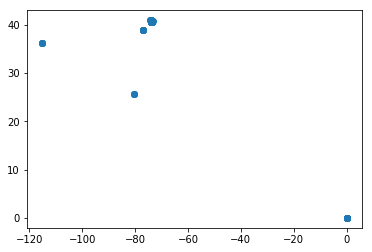

In [10]:
plt.scatter(df_greenAug['Pickup_longitude'], df_greenAug['Pickup_latitude'])

In [22]:
df_traffic

,Unnamed: 0,Date,Weekday,Segment ID,Direction,Total Traffic,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,...,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Roadway Name,From,To,ID
0,0,02/02/2013,Saturday,2153,NB,5391.0,106,74,45.0,29.0,...,379,329,249,197,187,169,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
1,1,02/03/2013,Sunday,2153,NB,4085.0,109,74,55.0,37.0,...,242,217,210,144,125,79,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
2,2,02/04/2013,Monday,2153,NB,5867.0,36,28,11.0,16.0,...,425,358,224,185,132,74,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
3,3,02/05/2013,Tuesday,2153,NB,6172.0,42,28,16.0,12.0,...,446,424,305,219,171,76,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
4,4,02/06/2013,Wednesday,2153,NB,5597.0,35,38,12.0,14.0,...,401,338,236,186,123,76,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
5,5,02/07/2013,Thursday,2153,NB,5302.0,33,26,14.0,22.0,...,356,339,275,225,169,104,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
6,6,02/08/2013,Friday,2153,NB,6448.0,35,28,18.0,14.0,...,531,393,351,276,242,154,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
7,7,02/09/2013,Saturday,2153,NB,5504.0,110,73,46.0,32.0,...,387,336,254,201,191,174,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
8,8,02/10/2013,Sunday,2153,NB,4171.0,114,77,58.0,40.0,...,246,221,214,147,121,85,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
9,9,02/11/2013,Monday,2153,NB,5989.0,38,30,15.0,19.0,...,433,365,228,189,136,75,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1


In [23]:
df_traffic_percent

,Unnamed: 0,Date,Weekday,Segment ID,Direction,Total Traffic,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,0,02/02/2013,Saturday,2153,NB,5391.0,106.000000,-30.188679,-39.189189,-35.555556,...,-9.732360,7.277628,-18.592965,21.604938,-3.807107,-13.192612,-24.316109,-20.883534,-5.076142,-9.625668
1,1,02/03/2013,Sunday,2153,NB,4085.0,-35.502959,-32.110092,-25.675676,-32.727273,...,-12.000000,-5.519481,7.560137,-19.169329,-4.347826,-10.330579,-3.225806,-31.428571,-13.194444,-36.800000
2,2,02/04/2013,Monday,2153,NB,5867.0,-54.430380,-22.222222,-60.714286,45.454545,...,29.878049,-0.234742,-1.411765,11.933174,-9.381663,-15.764706,-37.430168,-17.410714,-28.648649,-43.939394
3,3,02/05/2013,Tuesday,2153,NB,6172.0,-43.243243,-33.333333,-42.857143,-25.000000,...,2.879581,21.882952,-7.933194,7.936508,-6.302521,-4.932735,-28.066038,-28.196721,-21.917808,-55.555556
4,4,02/06/2013,Wednesday,2153,NB,5597.0,-53.947368,8.571429,-68.421053,16.666667,...,18.209877,0.261097,1.822917,-5.626598,8.672087,-15.710723,-30.177515,-21.186441,-33.870968,-38.211382
5,5,02/07/2013,Thursday,2153,NB,5302.0,-56.578947,-21.212121,-46.153846,57.142857,...,-50.165017,170.860927,3.178484,-13.744076,-2.197802,-4.775281,-18.879056,-18.181818,-24.888889,-38.461538
6,6,02/08/2013,Friday,2153,NB,6448.0,-66.346154,-20.000000,-35.714286,-22.222222,...,21.813031,20.465116,-11.003861,5.206074,9.484536,-25.988701,-10.687023,-21.367521,-12.318841,-36.363636
7,7,02/09/2013,Saturday,2153,NB,5504.0,-28.571429,-33.636364,-36.986301,-30.434783,...,-9.546539,7.124011,-18.719212,21.818182,-3.731343,-13.178295,-24.404762,-20.866142,-4.975124,-8.900524
8,8,02/10/2013,Sunday,2153,NB,4171.0,-34.482759,-32.456140,-24.675325,-31.034483,...,-11.516854,-5.714286,7.744108,-19.687500,-4.280156,-10.162602,-3.167421,-31.308411,-17.687075,-29.752066
9,9,02/11/2013,Monday,2153,NB,5989.0,-55.294118,-21.052632,-50.000000,26.666667,...,35.202492,-0.230415,1.154734,9.132420,-9.414226,-15.704388,-37.534247,-17.105263,-28.042328,-44.852941


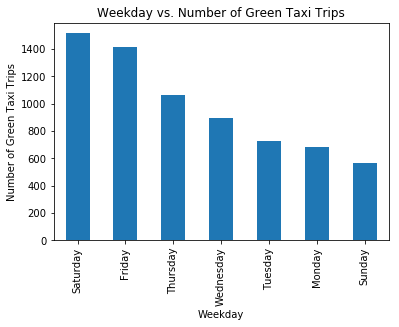

In [39]:
df_greenAug['Weekday'].value_counts().plot(kind='bar', sort_columns=False)
plt.ylabel('Number of Green Taxi Trips')
plt.xlabel('Weekday')
plt.title('Weekday vs. Number of Green Taxi Trips')
f1 = plt.gcf()

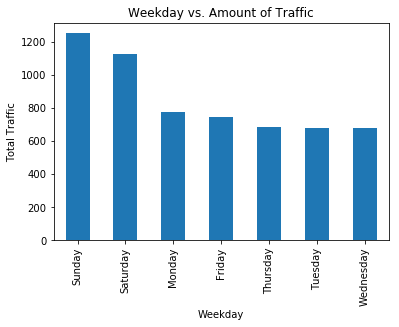

In [40]:
df_traffic_percent['Weekday'].value_counts().plot(kind='bar', sort_columns=False)
plt.ylabel('Total Traffic')
plt.xlabel('Weekday')
plt.title('Weekday vs. Amount of Traffic')
f1 = plt.gcf()

In [30]:
#DF = pd.merge(df_greenAug,df_traffic_percent,on=['Weekday'])
#DF.groupby([['Weekday']]).sum().unstack().plot(kind = 'bar')